# Analyse de l'évolution de la tension en fonction de l'angle de rotation du moteur 

Cette mesure consiste à faire varier l'angle de rotation du polariseur à l'aide d'un moteur et de mesurer le tension recupéré par un photodetecteur connecté à un picoscope 2406B. Cela permet d'étudier le comportement optique du système, tel que la transmission ou l'atténuation du faisceau lumineux. 

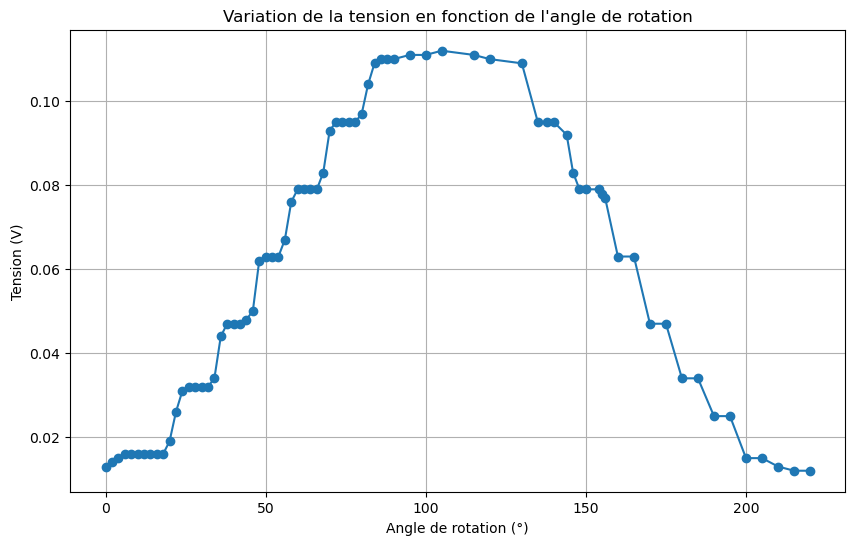

In [ ]:
import numpy as np 
import matplotlib.pyplot as plt

# Angle de rotation du moteur en degrés
theta = [0, 2, 4, 6, 8, 10, 12, 14, 16, 18, 20, 22, 24, 26, 28, 30, 32, 34, 36, 38, 40, 42, 44, 46, 48, 50, 52, 54, 56, 58, 60, 62, 64, 66, 68, 70, 72, 74, 76, 90, 100, 150, 154, 156, 78, 80, 82, 84, 86, 88, 95, 105, 115, 120, 130, 135, 138, 140, 144, 146, 148, 155, 160, 165, 170, 175, 180, 185, 190, 195, 200, 205, 210, 215, 220]

# Tension en V
V = [0.013, 0.014, 0.015, 0.016, 0.016, 0.016, 0.016, 0.016, 0.016, 0.016, 0.019, 0.026, 0.031, 0.032, 0.032, 0.032, 0.032, 0.034, 0.044, 0.047, 0.047, 0.047, 0.048, 0.05, 0.062, 0.063, 0.063, 0.063, 0.067, 0.076, 0.079, 0.079, 0.079, 0.079, 0.083, 0.093, 0.095, 0.095, 0.095, 0.11, 0.111, 0.079, 0.079, 0.077, 0.095, 0.097, 0.104, 0.109, 0.11, 0.11, 0.111, 0.112, 0.111, 0.11, 0.109, 0.095, 0.095, 0.095, 0.092, 0.083, 0.079, 0.078, 0.063, 0.063, 0.047, 0.047, 0.034, 0.034, 0.025, 0.025, 0.015, 0.015, 0.013, 0.012, 0.012, 0.012]


# Tri des données 
sorted_data = sorted(zip(theta, V))  # Associe les degrés et tensions, puis trie
theta_sorted, V_sorted = zip(*sorted_data)  # Décompose en deux listes triées

plt.figure(figsize=(10, 6))
plt.plot(theta_sorted, V_sorted, marker='o')
plt.title("Variation de la tension en fonction de l'angle de rotation")
plt.xlabel("Angle de rotation (°)")
plt.ylabel("Tension (V)")
plt.grid(True)
plt.show()



### Description de la figure et interprétation

On observe la tension augmente progressivement à mesure que l'angle de rotation du polariseur augmente, atteignant un maximum autour de 90°. Or on s'attend à ce que pour un angle $\theta$, la polarisation tourne de $2\theta$ et on s'attend donc à avoir une loi en $sin^2(2\theta)$, on devrait donc voir plusieurs période entre 0° et 180°. En effet, l'élément qui tourne réellement n'est pas le moteur directement, mais la petite roue fixée par la courroie. Il se peut que la conversion du mouvement du moteur vers la roue introduise une erreur dans la relation entre l'angle de rotation mesuré et l'angle réel du polariseur. Aussi, après ce maximum, on remarque un plateau entre 90° et 120°, où la tension semble se stabiliser sur une plage d'angles avant de redescendre.  Enfin, tout au long de la montée de la courbe, plusieurs petits paliers sont visibles, ce qui suggère des variations discrètes dans la transmission lumineuse à certains angles. Ces paliers peuvent être expliqués à cause d l'atténuateur placé sur la photodiode , affectant ainsi la manière dont la lumière est transmise ou atténuée à ces positions spécifiques. Ce comportement pourrait être dû à une saturation du système de mesure ou à une limite de la transmission lumineuse. Si la lumière incidente dépasse une certaine intensité, l'atténuateur ou la photodiode pourrait atteindre une plage où il ne répond plus linéairement à l'intensité lumineuse, créant ainsi un plateau dans les mesures et des paliers tout au long de la montée et de la descente.

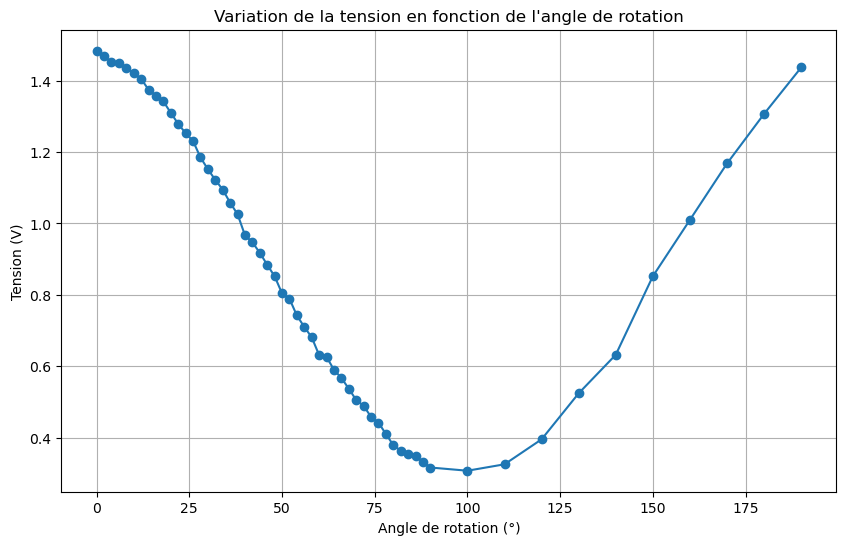

In [ ]:
theta1 = np.arange(0, 90, 2)
theta2 = np.arange(90, 191, 10)
theta = np.concatenate((theta1, theta2))

V = [
    1.484, 1.468, 1.452, 1.449, 1.436, 1.421, 1.405, 1.375, 1.358, 1.342,
    1.31, 1.279, 1.253, 1.231, 1.185, 1.152, 1.122, 1.095, 1.058, 1.026,
    0.967, 0.947, 0.918, 0.884, 0.852, 0.804, 0.789, 0.742, 0.71, 0.681,
    0.631, 0.626, 0.59, 0.567, 0.537, 0.505, 0.489, 0.458, 0.442, 0.41,
    0.379, 0.363, 0.355, 0.347, 0.332, 0.316, 0.307, 0.325, 0.395, 0.524,
    0.632, 0.852, 1.01, 1.168, 1.307, 1.437
]

plt.figure(figsize=(10, 6))
plt.plot(teta, V, marker='o')
plt.title("Variation de la tension en fonction de l'angle de rotation")
plt.xlabel("Angle de rotation (°)")
plt.ylabel("Tension (V)")
plt.grid(True)
plt.show()



### Description de la figure et interprétation 

On refait la mesure en chngeant le filtre devant la photodiode. On trouve alors que 1 période correspond à 200° de rotation sur la petite roue, ce qui correspond à 90° de rotation du polariseur. Donc on peut en déduire un facteur de conversion tel que $\theta_{pola} = \frac{90}{200} \times \theta_{moteur}$. On réadapte donc nos données et on modélise aux attentes théorique pour voir si cela correspond.



C:\Users\abitr\AppData\Local\Temp\ipykernel_17560\3895170461.py:16: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


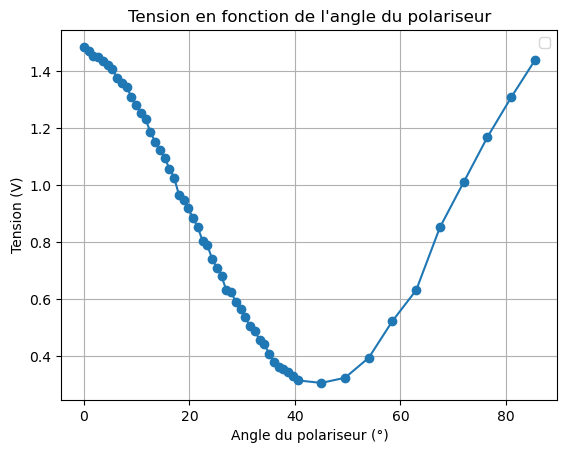

Paramètres ajustés : A = -1.1522416220994476, phi = 0.017895103901744494, C = 1.428672798487756


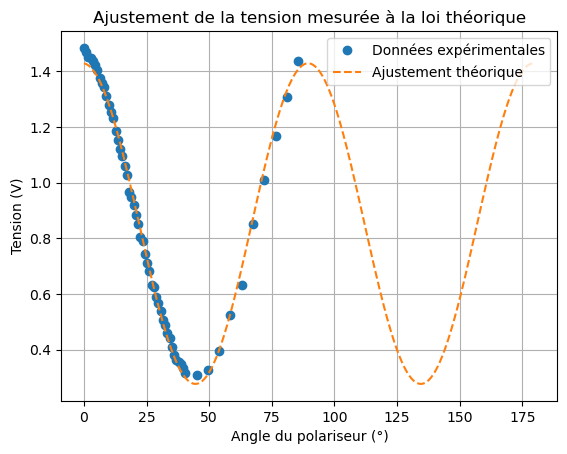

In [14]:
from scipy.optimize import curve_fit

# Facteur de conversion entre l'angle du moteur et l'angle du polariseur
# 1 période sur la roue correspond à 200° moteur pour 90° polariseur
facteur_conversion = 90 / 200

# Calcul des angles du polariseur
theta_pola = theta * facteur_conversion

# Tracer la courbe de tension en fonction de l'angle du polariseur
plt.plot(theta_pola, V, marker='o')
plt.xlabel("Angle du polariseur (°)")
plt.ylabel("Tension (V)")
plt.title("Tension en fonction de l'angle du polariseur")
plt.grid(True)
plt.legend()
plt.show()

def model_theorique(theta, A, phi, C):
    return A * np.sin(2 * np.radians(theta) + phi)**2 + C

# Ajustement des paramètres du modèle aux données expérimentales
params, covariance = curve_fit(model_theorique, theta_pola, V, p0=[1, 0, 0])

# Paramètres ajustés
A, phi, C = params
print(f"Paramètres ajustés : A = {A}, phi = {phi}, C = {C}")

# Tracer les données expérimentales et la courbe ajustée
plt.plot(theta_pola, V, 'o', label="Données expérimentales")
theta_pola_dense = np.linspace(0, 180, 500)  # Angles du polariseur pour la courbe ajustée
plt.plot(theta_pola_dense, model_theorique(theta_pola_dense, *params), label="Ajustement théorique", linestyle='--')
plt.xlabel("Angle du polariseur (°)")
plt.ylabel("Tension (V)")
plt.title("Ajustement de la tension mesurée à la loi théorique")
plt.grid(True)
plt.legend()
plt.show()
plt.show()

### Description de la figure et interprétation

Le graphique montre alors bien plusieurs oscillations entre 0° et 180°. Après ajustement des données avec le facteur de conversion et les paramètres optimaux, la courbe théorique s'aligne bien sur les données expérimentales, confirmant que la loi en $sin^2(2\theta)$ décrit bien le système. On obtient comme paramètres ajustés une amplitude de $A=1.152V$, un faible déphasage $\phi=0.0179rad \approx 1°$ attribuée à une petite erreur dans le calibrage initial de l'angle zéro ou dans la conversion entre l'angle du moteur et celui du polariseur et un offset $C=1.429$ qui est une composante constante dans la mesure de tension, indépendante de l'angle. Cela peut être causé par un signal de base du photodétecteur ou par une lumière ambiante incidente qui n'est pas totalement atténuée par le polariseur. 

### Conclusion 

L'expérience met en évidence une relation claire entre l'angle du polariseur et la tension mesurée, confirmant la loi théorique de la polarisation $sin^2(2\theta)$. Cependant, des erreurs liées à la mécanique (conversion angle moteur/polariseur) et à la saturation du système de mesure doivent être corrigées pour obtenir des résultats plus précis. Les ajustements réalisés permettent de mieux comprendre ces limitations et de confirmer le comportement attendu du système.

# Analyse de l'évolution de la puissance en fonction de l'angle de rotation

Dans cette expérience, nous cherchons à étudier l'effet de la rotation d'un polariseur sur la transmission de la lumière dans un système optique. Plus précisément, nous mesurons la puissance lumineuse reçue, à l'aide d'un puissancemètre, en fonction de l'angle de rotation du polariseur. Ce type de mesure permet e mieux comprendre le comportement optique du système.
Objectifs de la mesure :

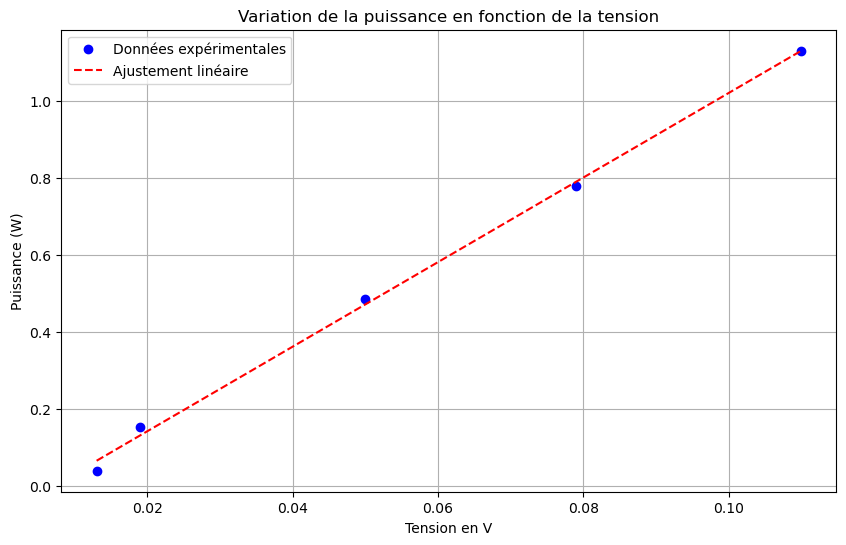

Coefficients de l'ajustement linéaire :
Pente : 10.97
Ordonnée à l'origine : -0.077


In [25]:
# Tension mesuré dans les premières conditions expérimentales

V = [0.013, 0.019, 0.05, 0.079, 0.11]

# Puissance en mW

P = [0.04, 0.154, 0.485, 0.78, 1.13]

# Ajustement linéaire
coefficients = np.polyfit(V, P, 1)  # Ajustement linéaire (polynôme de degré 1)
p_fit = np.poly1d(coefficients)

# Générer les valeurs ajustées
V_fit = np.linspace(min(V), max(V), 100)
P_fit = p_fit(V_fit)

# Tracer les données et l'ajustement linéaire
plt.figure(figsize=(10, 6))
plt.plot(V, P, 'o', label="Données expérimentales", color='blue')
plt.plot(V_fit, P_fit, label="Ajustement linéaire", color='red', linestyle='--')
plt.title("Variation de la puissance en fonction de la tension")
plt.xlabel("Tension en V")
plt.ylabel("Puissance (W)")
plt.grid(True)
plt.legend()
plt.show()

# Affichage des coefficients de l'ajustement
print("Coefficients de l'ajustement linéaire :")
print(f"Pente : {coefficients[0]:.2f}")
print(f"Ordonnée à l'origine : {coefficients[1]:.3f}")

### Description de la courbe et interprétation

La pente de la droite d'ajustement est de 10.97. Cela signifie que pour chaque augmentation de 1 volt (V) dans la tension mesurée, la puissance lumineuse augmente de 10.97 mW. Chaque variation d'une unité de tension produit une variation de 10.97 milliwatts dans la puissance. L'ordonnée à l'origine indique que, théoriquement, lorsque la tension est à 0 V, la puissance serait -0.077 mW. Cela peut a refléter un décalage dû à des caractéristiques de l'équipement de mesure (comme la photodiode ou l'amplification électronique), qui pourrait entraîner une petite valeur négative pour la puissance lorsque la tension est proche de zéro.

### Conclusion 

La relation entre la tension V et la puissance P est linéaire avec une pente de 10.97 mW/V, indiquant une forte proportionnalité entre ces deux grandeurs. L'ordonnée à l'origine, bien que négative, peut être le résultat d'une petite erreur systématique ou d'un décalage dans la calibration du système de mesure. En pratique, cette valeur serait ajustée à zéro pour une plus grande précision.